## Copyrights
1. textbook official repository: https://github.com/WegraLee/deep-learning-from-scratch
    * 아래 python code들은 [chapter 4](https://github.com/WegraLee/deep-learning-from-scratch/tree/master/ch04)에서 가져왔습니다.
1. fork source: https://github.com/ExcelsiorCJH/DLFromScratch [(chapter4)](https://nbviewer.org/github/ExcelsiorCJH/DLFromScratch/blob/master/Chap04-Neural_Network_Traing/Chap04-Neural_Network_Training.ipynb)
1. additional repository: https://github.com/SDRLurker/deep-learning [(4장)](https://nbviewer.org/github/SDRLurker/deep-learning/blob/master/4장.ipynb)

### Customized by Gil-Jin Jang

## 파일 설명

| 파일명 | 파일 용도 | 관련 절 | 페이지 |
|:--   |:--      |:--    |:--      |
| [Chap04-NN_Training.ipynb](Chap04-NN_Training.ipynb) | 내용 + 실행가능 코드 | 4.1-4.6 | 
| [gradient_1d.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_1d.py) | 수치 미분으로 기울기를 구합니다. | 4.3.2 수치 미분의 예 | 125 |
| [gradient_2d.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py) | 수치 미분으로 기울기를 구합니다(두 편미분을 동시에 계산). | 4.4 기울기 | 129 |
| [gradient_method.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_method.py) | 경사하강법의 갱신 과정을 보여줍니다. | 4.4.1 경사법(경사 하강법) | 132 |
| [gradient_simplenet.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_simplenet.py) | simpleNet 클래스 | 4.4.2 신경망에서의 기울기 | 134 |
| [train_neuralnet.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/train_neuralnet.py) | 미치배치 방식으로 학습하고 시험 데이터로 평가합니다. | 4.5.2 미니배치 학습 구현하기 / 4.5.3 시험 데이터로 평가하기 | 141, 143 |
| [two_layer_net.py](https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/two_layer_net.py) | 2층 신경망 클래스 | 4.5.1 2층 신경망 클래스 구현하기 | 137 |

## 출처

이미지 출처 1: overfitting https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76

# Chap04 - 신경망 학습

> 이번 장에서는 신경망 학습(training)에 대해 알아보자. **학습**이란 학습 데이터로부터 가중치 매개변수의 최적값을 자동으로 찾는것을 말한다. 또한, 이번 장에서는 신경망이 학습할 수 있도록 하는 **지표**에 해당하는 *손실함수* 에 대해 알아보자.

## 목차
```
4.1 데이터에서 학습한다! 
__4.1.1 데이터 주도 학습 
__4.1.2 훈련 데이터와 시험 데이터 
4.2 손실 함수 
__4.2.1 평균 제곱 오차 
__4.2.2 교차 엔트로피 오차 
__4.2.3 미니배치 학습 
__4.2.4 (배치용) 교차 엔트로피 오차 구현하기 
__4.2.5 왜 손실 함수를 설정하는가? 
4.3 수치 미분 
__4.3.1 미분 
__4.3.2 수치 미분의 예 
__4.3.3 편미분 
4.4 기울기 
__4.4.1 경사법(경사 하강법) 
__4.4.2 신경망에서의 기울기 
4.5 학습 알고리즘 구현하기 
__4.5.1 2층 신경망 클래스 구현하기
__4.5.2 미니배치 학습 구현하기 
__4.5.3 시험 데이터로 평가하기
```

## 4.1 데이터에서 학습한다!

### 4.1.1 데이터 주도 학습

> 딥러닝을 **종단간 기계학습(end-to-end machine learning)**이라고도 한다. 종단간은 ‘처음부터 끝까지’라는 의미로, 데이터(입력)에서 목표한 결과(출력)를 얻는다는 뜻을 담고 있다.


<img src="./images/4-2.png" width="70%" height="70%" />

### 4.1.2 훈련 데이터와 시험 데이터

머신러닝과 딥러닝에서는 데이터를 **훈련 데이터(training data)**와 **시험 데이터(test data)**로 나눠 학습과 테스트를 진행하는 것이 일반적이다. 보통 전체 데이터에서 훈련 데이터와 시험 데이터의 비율은 `6:4` 또는 `7:3`으로 나눈다.

<img src="./images/train-test.png" width="70%" height="70%" />

먼저, 훈련 데이터만 사용하여 학습하면서 최적의 매개변수(가중치, 편향)를 찾는다. 그런 다음 시험 데이터를 이용하여 훈련된 모델의 성능을 평가한다. 이렇게 데이터를 나누는 이유는 범용성(일반화, generalization)을 위함이다. 만약, 데이터를 나누지 않고 전체 데이터를 가지고 학습을 한다면 이 모델은 학습한 데이터 셋에만 지나치게 최적화되어 새로운 데이터에 대한 성능은 떨어지게 된다. 이러한 문제를 **오버피팅(overfitting)**이라 한다. (그림 출처: [링크](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76) 참고)

![](./images/overfitting.png)

## 4.2 손실 함수

> loss function == error function == cost function

신경망 학습에서는 현재의 상태를 '하나의 **지표**'로 표현한다. 이러한 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이 신경망 학습이다. 신경망에서 사용하는 지표를 **손실함수(Loss/Cost function)**라고 한다. 손실함수는 실제와 이론을 모두 고려해 가장 적절한 함수를 선택하며, 보통 평균제곱오차(MSE, mean squared error)와 교차 엔트로피 오차(CEE, cross entropy error)를 많이 사용한다.

### 4.2.1 평균제곱오차 MSE

가장 많이 쓰이는 손실함수는 **평균제곱오차(MSE, Mean Squared Error)**다. MSE의 수식은 다음과 같다.

$$
E = \frac{1}{2} \sum_{k}{\left( y_k - t_k \right)}^{2}
$$

- $y_k$ : 신경망 모델이 추정한 값
- $t_k$ : 정답 레이블 또는 데이터

위의 MSE 함수를 NumPy를 이용해 구현하면 다음과 같다.

In [1]:
import numpy as np

In [2]:
# MSE 함수 구현
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
# 정답은 '2' -> one-hot
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1) : '2'일 확률이 가장 높다고 추정함(0.6) -> softmax 결과값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('MSE of ex1 =', mean_squared_error(np.array(y), np.array(t)))

# ex2) : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('MSE of ex2 =', mean_squared_error(np.array(y), np.array(t)))

MSE of ex1 = 0.09750000000000003
MSE of ex2 = 0.5975


## 4.2 교차 엔트로피 오차 CEE

또 다른 손실 함수로서 **교차 엔트로피 오차(CEE, Cross Entropy Error)**도 자주 사용한다. CEE의 수식은 다음과 같다.

$$
E = - \sum_{k}{t_k \log{y_k}}
$$

- $\log$ : 밑이 $e$인 자연로그($\log_{e}$)
- $y_k$ : 신경망 모델의 출력
- $t_k$ : 정답 레이블

> 참고: Entropy in information theory
$$ H(x) = E[-\log x] = \int -p(x) \log x  dx $$

$t_k$는 정답에 해당하는 인덱스의 원소만 `1`이고 나머지는 `0`이다(원-핫 인코딩). 따라서, 위의 식처럼 실제로 정답일 때의 추정($t_k = 1$일 때의 $y_k$)의 계산만 하면 된다.

<img src="./images/4-3.png" width="50%" height="50%"/>

NumPy를 이용해서 교차엔트로피를 구현해보자.

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7  # log0 방지를 위함
    return -np.sum(t * np.log(y + delta))

In [5]:
# 정답은 '2' -> one-hot
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1) : '2'일 확률이 가장 높다고 추정함(0.6) -> softmax 결과값
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('MSE of ex1 =', cross_entropy_error(np.array(y), np.array(t)))

# ex2) : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print('MSE of ex2 =', cross_entropy_error(np.array(y), np.array(t)))

MSE of ex1 = 0.510825457099338
MSE of ex2 = 2.302584092994546


### 4.2.3 미니배치 학습

딥러닝은 훈련 데이터를 이용해 학습하면서, 훈련 데이터에 대한 손실함수의 값을 구하고 그 값을 **최소**로하는 매개변수(가중치, 편향)를 찾아내는 것이다. 이를 위해서는 모든 훈련 데이터를 대상으로 손실함수 값을 구해야 한다. 보통 딥러닝은 미니배치(Mini-batch) 학습을 하기때문에 미니배치 크기만큼의 데이터에 대한 각각의 손실함수를 구해 평균을 내어 **'평균 손실 함수'**를 계산한다. 

$$
E = - \frac{1}{N}\sum_{n}{\sum_{k}{t_{nk}\log{y_{nk}}}}
$$

- $N$ : 미니배치 크기
- $t_{nk}$ : $n$번째 데이터의 $k$차원 째의 값을 의미($y_{nk}$-추정, $t_{nk}$-정답)

딥러닝에서는 훈련 데이터로부터 미니배치(mini-batch)만큼 일부만 추출하여 학습을 하고, 미니배치의 평균 손실함수를 전체 훈련 데이터의 **'근사치'**로 이용한다. 이러한 학습방법을 **미니배치 학습**이라 한다.

아래의 코드는 MNIST 데이터셋에서 미니배치 만큼 데이터를 무작위로 가져오는 것을 구현한 코드이다.

In [6]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
# sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist

In [7]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print('x_train.shape :', x_train.shape)
print('t_train.shape :', t_train.shape)
print('x_test.shape :', x_test.shape)
print('t_test.shape :', t_test.shape)

x_train.shape : (60000, 784)
t_train.shape : (60000, 10)
x_test.shape : (10000, 784)
t_test.shape : (10000, 10)


In [8]:
train_size = x_train.shape[0]
batch_size = 20
# 0~59999 에서 20개 random하게 추출
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('batch_mask :', batch_mask)
print('x_batch.shape :', x_batch.shape)
print('t_batch.shape :', t_batch.shape)

batch_mask : [ 5445 44766  8867 44885 15609  9743 15957  8565 22578 27493  6694 50028
 59394 55139 13668 11267 27444 13773 39702  3965]
x_batch.shape : (20, 784)
t_batch.shape : (20, 10)


### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기



In [9]:
# mini-batch CEE
def cross_entropy_error(y, t):
    if y.ndim == 1:   # vector y.shape = (20,)
        t = t.reshape(1, t.size)  # (1,20)
        y = y.reshape(1, y.size)  # (1,20)
        
    batch_size = y.shape[0]   # number of samples in a batch
    return -np.sum(t * np.log(y), axis=0) / batch_size

정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7' 등의 숫자 레이블로 주어졌들 때의 교차 엔트로피 오차를 다음과 같이 구할 수 있다.

In [10]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # y: N x C     [0.1 0.1 0.6 0.1 0.1 .....]
    # t: N x 1, N  [2] --> [0 0 1 0 ....]
    # t*log(y) = 0*0.1+0*0.1+1*0.6+... = 1*0.6

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

신경망 학습의 지표를 손실함수가 아닌 정확도로 설정할 경우 정확도는 33%, 34% 처럼 연속적인 값이 아닌, 불연속적인 값으로 변하기 때문에 '미분'이 가능하지 않다. 활성화 함수로 계단함수를 사용하지 않는 이유 또한, 값이 불연속적이기 때문이다. 

<img src="./images/4-4.png" width="80%" height="80%"/>

## 4.3 수치 미분

### 4.3.1 미분

미분은 순간 변화의 정도를 나타낸 것이며, 수식은 다음과 같다.

$$
\frac{df(x)}{dx} = \lim_{h \rightarrow 0}{\frac{f(x+h)-f(x-h)}{2h}}
$$

불연속 함수의 경우 양의 방향에서만 극한값을 구할 수 있다.
$$
\frac{df(x)}{dx} = \lim_{h \rightarrow 0}{\frac{f(x+h)-f(x)}{h}}
$$
마찬가지로 음의 방향에서만 극한값을 구할 수 있다.
$$
\frac{df(x)}{dx} = \lim_{h \rightarrow 0}{\frac{f(x)-f(x-h)}{h}}
$$

In [11]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예

아래의 함수를 미분해보도록 하자.

$$
y = 0.01x^{2} + 0.1x
$$

In [12]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.2999999999986347


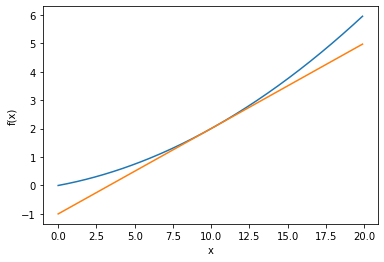

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.xlabel('x'); plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 편미분

$$
f(x_0, x_1) = x_{0}^{2} + x_{1}^{2}
$$

$$
\frac{\partial f}{\partial x_0} = 2x_0, \quad \frac{\partial f}{\partial x_1} = 2x_1
$$

## 4.4 기울기

위에서 편미분을 계산할 때, $x_0$와 $x_1$을 따로 계산했다. 이번에는 $(x_0, x_1)$ 양쪽의 편미분을 묶어서 $\left( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right)$ 계산해보자. 이때, $\left( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right)$ 와 같이 모든 변수의 편미분을 벡터로 나타낸 것을 **기울기 벡터**(gradient vector)라고 한다. 

In [14]:
def _numerical_gradient_no_batch(f, x):
    # f: method (function), x: (p,) vector
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad  # size (p,) vector


def numerical_gradient(f, X):  # X: vector or matrix
    if X.ndim == 1:   # vector
        return _numerical_gradient_no_batch(f, X)
    else:   # matrix of size N x p
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [15]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)  # (1,) scalar
    else:   # x is of size (N,p)
        return np.sum(x**2, axis=1)  # (N,)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

No handles with labels found to put in legend.


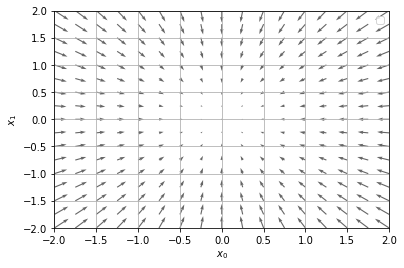

In [16]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.grid()
plt.legend()
plt.draw()
plt.show()

### 4.4.1 경사 하강법

딥러닝 학습에서 최적의 매개변수(가중치, 편향) 즉, 손실함수가 최소가 되게 하는 매개변수를 찾기 위해 **경사 하강법(Gradient descent)**를 사용한다.

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$


$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

$\eta$는 업데이트하는 양을 나타내며, **학습률(learning rate)**라고 한다.

> 학습률 같은 매개변수를 하이퍼파라미터(hyper parameter)라고 한다. 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수다.

In [17]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

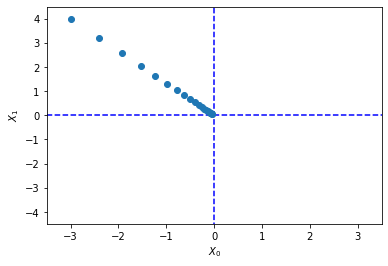

In [18]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.show()

In [19]:
x

array([-0.03458765,  0.04611686])

### 4.4.2 신경망에서의 기울기

$$
\mathrm{W} = \begin{bmatrix} w_{11} & w_{21}  & w_{31} \\ w_{12} & w_{22} & w_{32} \end{bmatrix}, \quad
\frac{\partial L}{\partial \mathrm{W}} = \begin{bmatrix} \frac { \partial L }{ \partial w_{ 11 } }  & \frac { \partial L }{ \partial w_{ 21 } } & \frac { \partial L }{ \partial w_{ 31 } }  \\ \frac { \partial L }{ \partial w_{ 12 } }  & \frac { \partial L }{ \partial w_{ 22 } } & \frac { \partial L }{ \partial w_{ 32 } }  \end{bmatrix}
$$

In [20]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

'''
// equivalent C++ class
class SimpleNet {
    double **W;
    ...
    
    SimpleNet() { }
    ~SimpleNet() {}
    double predict(double *x) { ... }
}
'''

class simpleNet:
    #W = None   # not declaration, but initialization
    def __init__(self):  # constructor, self 
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        return cross_entropy_error(softmax(self.predict(x)),t)
        '''
        # longer lines
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss
        '''        

In [21]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(net.W)
print(dW)

[[ 1.73178159 -0.5055485   1.32228647]
 [ 0.74678435  0.44315331 -0.05855642]]
[[ 0.38031224  0.0755902  -0.45590244]
 [ 0.57046836  0.1133853  -0.68385366]]


## 4.5 학습 알고리즘 구현하기

1. 미니배치: 훈련 데이터 중 일부를 무작위로 가져옴
2. 기울기 산출: 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
3. 매개변수 갱신: 학습률 만큼 매개변수를 갱신한다.(Gradient Descent)
4. 1 ~ 3 단계 반복해준다.

In [22]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)       # softmax y (N,c)
        y = np.argmax(y, axis=1)  # int (N,1)
        t = np.argmax(t, axis=1)  # int index (N,1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        # sum of number_of_correct / number_of_samples
        return accuracy
    
    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward prediction
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward gradient descent
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads   # {'W1': 784x100, 'b1': 100, 'W2': 100x10, 'b2':10}

In [23]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [24]:
x = np.random.rand(1, 784)  # 더미 입력 데이터(1장 분량)
t = np.random.rand(1, 10)  # 더미 정답 레이블(1장 분량)

grads = net.numerical_gradient(x, t)  # 기울기 계산
grads['W1'].shape

(784, 100)

### 4.5.2 미니배치 학습 구현하기 ~ 4.5.3 시험 데이터로 평가하기

> 1 에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다. 예를 들어, 훈련 데이터 10,000 개를 100 개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100 회 반복하면 모든 훈련 데이터를 ‘소진’한게 된다. 이 경우 100 회가 1 에폭이 된다.

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

# 저장할 리스트 정의
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복 수
iter_per_epoch = int(train_size / batch_size)   # train_size // batch_size

In [26]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for step in range(iters_num):
    # Mini-Batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    # {'W1': 784x100, 'b1': 100, 'W2': 100x10, 'b2':10}
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 과정 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 epoch 당 정확도 계산
    if (step+1) % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Step: {:04d}, Train Acc: {:.5f}, Test Acc: {:.5f}".format(step+1, train_acc, test_acc))

Step: 0600, Train Acc: 0.78307, Test Acc: 0.78670
Step: 1200, Train Acc: 0.87720, Test Acc: 0.87950
Step: 1800, Train Acc: 0.89973, Test Acc: 0.90150
Step: 2400, Train Acc: 0.90992, Test Acc: 0.91100
Step: 3000, Train Acc: 0.91535, Test Acc: 0.91860
Step: 3600, Train Acc: 0.92043, Test Acc: 0.92260
Step: 4200, Train Acc: 0.92435, Test Acc: 0.92520
Step: 4800, Train Acc: 0.92823, Test Acc: 0.92920
Step: 5400, Train Acc: 0.93093, Test Acc: 0.93120
Step: 6000, Train Acc: 0.93367, Test Acc: 0.93380
Step: 6600, Train Acc: 0.93562, Test Acc: 0.93730
Step: 7200, Train Acc: 0.93810, Test Acc: 0.93780
Step: 7800, Train Acc: 0.94143, Test Acc: 0.94010
Step: 8400, Train Acc: 0.94322, Test Acc: 0.94210
Step: 9000, Train Acc: 0.94470, Test Acc: 0.94350
Step: 9600, Train Acc: 0.94615, Test Acc: 0.94460


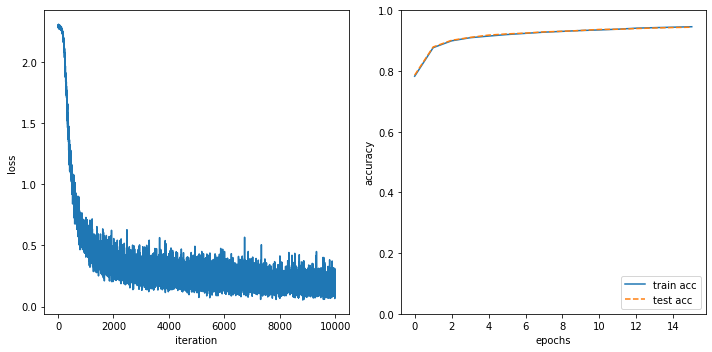

In [27]:
# 그래프 그리기
figsize(10, 5)
markers = {'train': 'o', 'test': 's'}
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x_loss = np.arange(len(train_loss_list))
ax1.plot(x_loss, train_loss_list)
ax1.set_xlabel("iteration")
ax1.set_ylabel("loss")

x_acc = np.arange(len(train_acc_list))
ax2.plot(x_acc, train_acc_list, label='train acc')
ax2.plot(x_acc, test_acc_list, label='test acc', linestyle='--')
ax2.set_xlabel("epochs")
ax2.set_ylabel("accuracy")
ax2.set_ylim(0, 1.0)
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 4.6 정리


- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터에서 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다. 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분을 구하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.